In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
df=pd.read_csv(r"C:\Users\hp\Downloads\crop_production (1).csv")

In [7]:
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [8]:
data = df.dropna()
print(data.shape)
test = df[~df["Production"].notna()].drop("Production",axis=1)
print(test.shape)

(242361, 7)
(3730, 6)


In [9]:
sum_maxp = data["Production"].sum()
data["percent_of_production"] = data["Production"].map(lambda x:(x/sum_maxp)*100)

C:\Users\hp\AppData\Local\Temp\ipykernel_3692\1048416122.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["percent_of_production"] = data["Production"].map(lambda x:(x/sum_maxp)*100)


In [10]:
data[:5]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,percent_of_production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,1.416670e-06
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,7.083351e-10
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,2.273756e-07
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,4.540428e-07
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,1.168753e-07


<Axes: xlabel='Crop_Year', ylabel='Production'>

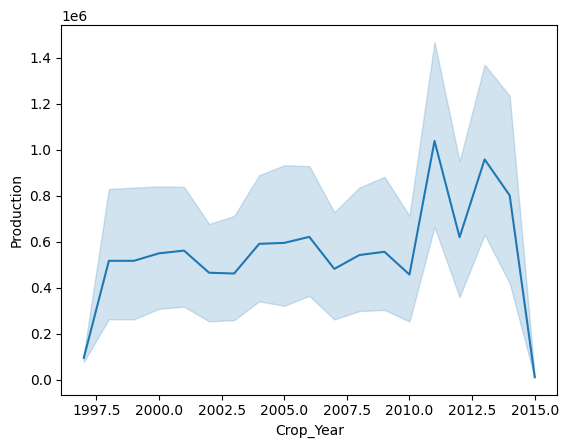

In [11]:
sns.lineplot(x="Crop_Year", y="Production", data=data)


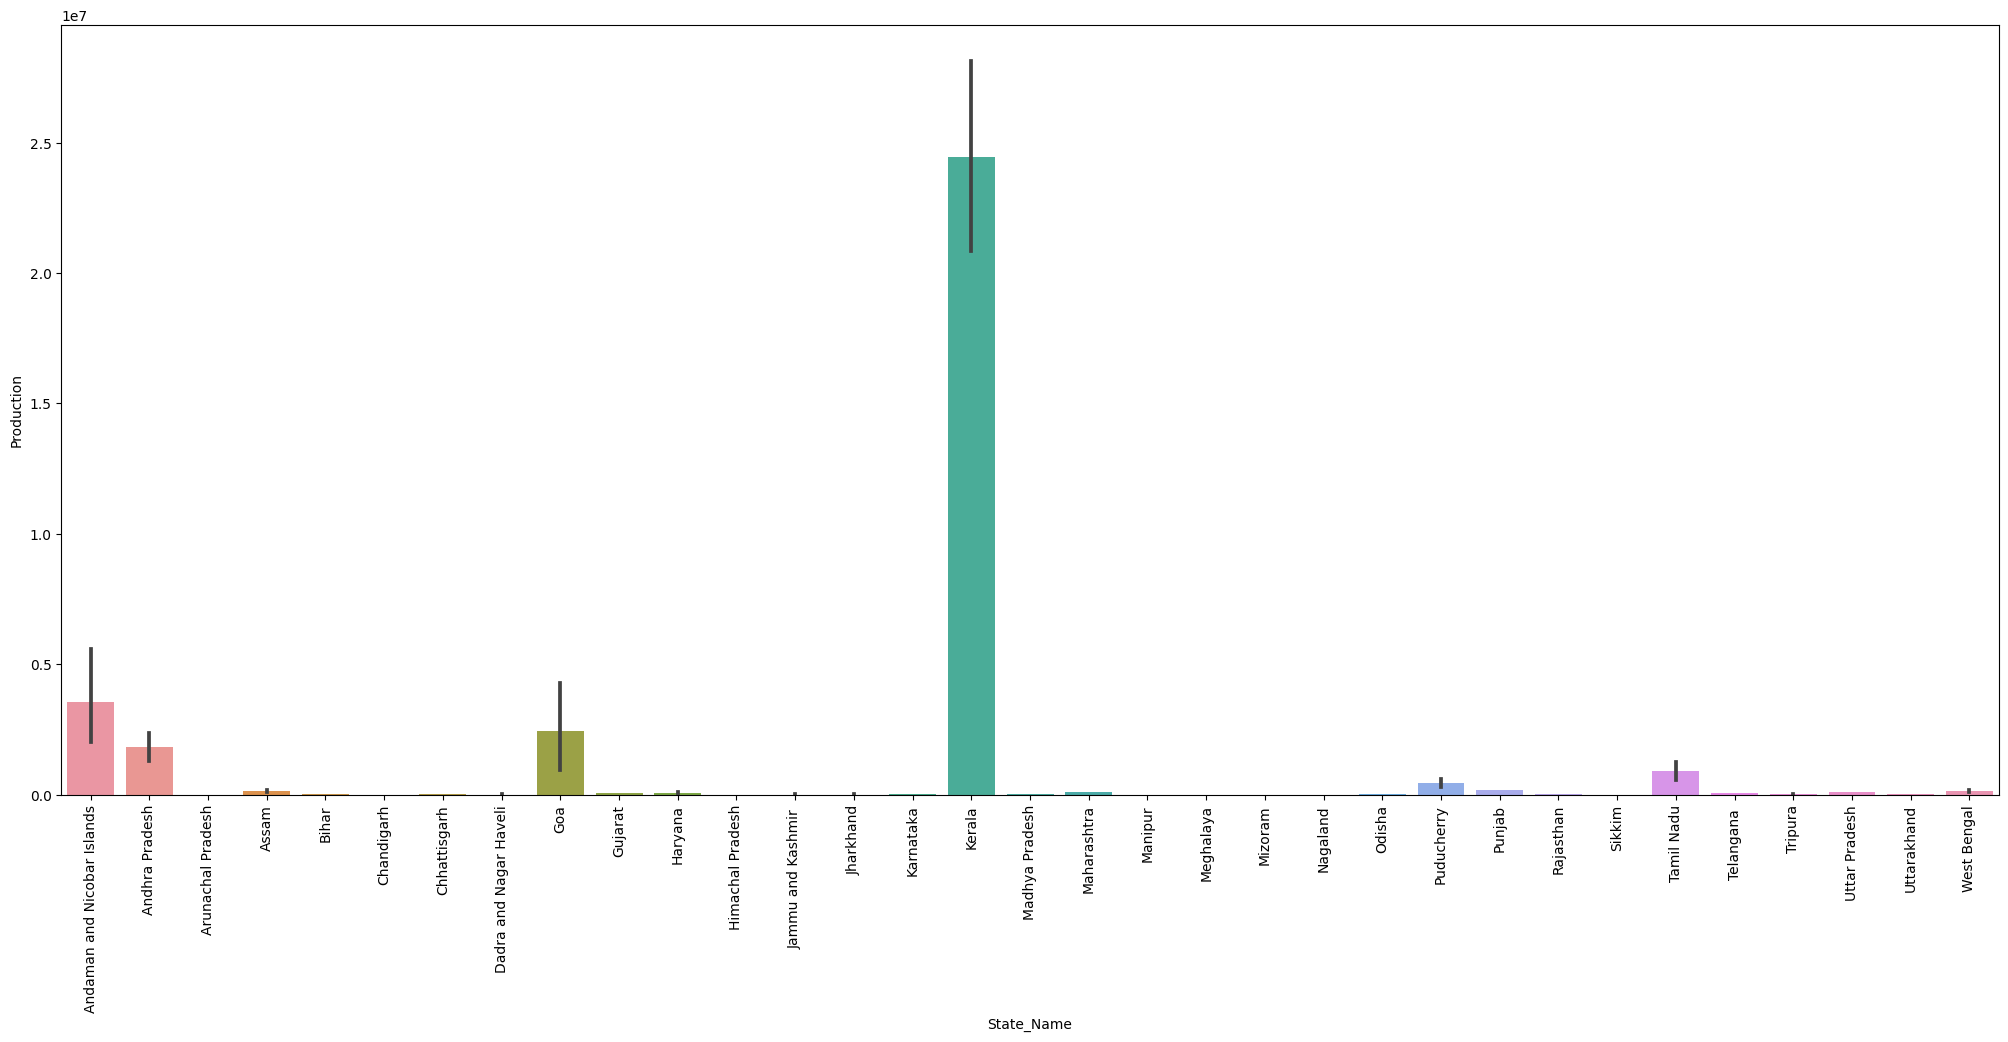

In [12]:
plt.figure(figsize=(25,10))
sns.barplot(x="State_Name", y="Production", data=data)
plt.xticks(rotation=90)
plt.show()

In [13]:
top_crop_pro = data.groupby("Crop")["Production"].sum().reset_index().sort_values(by='Production',ascending=False)
top_crop_pro[:5]

,Crop,Production
28,Coconut,1.299816e+11
106,Sugarcane,5.535682e+09
95,Rice,1.605470e+09
119,Wheat,1.332826e+09
87,Potato,4.248263e+08


In [14]:
rice_df = data[data["Crop"]=="Rice"]
print(rice_df.shape)
rice_df[:3]

(15082, 8)


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,percent_of_production
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.00,2.273756e-07
12,Andaman and Nicobar Islands,NICOBARS,2001,Kharif,Rice,83.0,300.00,2.125005e-07
18,Andaman and Nicobar Islands,NICOBARS,2002,Kharif,Rice,189.2,510.84,3.618459e-07


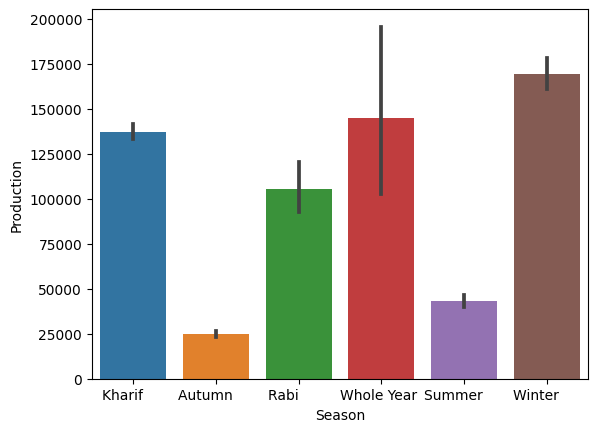

In [15]:
sns.barplot(x="Season", y="Production", data=rice_df)
plt.show()


In [16]:
top_rice_pro_dis = rice_df.groupby("District_Name")["Production"].sum().reset_index().sort_values(
    by='Production',ascending=False)
top_rice_pro_dis[:5]
sum_max = top_rice_pro_dis["Production"].sum()
top_rice_pro_dis["precent_of_pro"] = top_rice_pro_dis["Production"].map(lambda x:(x/sum_max)*100)
top_rice_pro_dis[:5]

,District_Name,Production,precent_of_pro
58,BARDHAMAN,34239976.0,2.132707
374,MEDINIPUR WEST,29192719.0,1.818328
612,WEST GODAVARI,27845309.0,1.734402
169,EAST GODAVARI,24690929.0,1.537925
494,SANGRUR,24448000.0,1.522794


In [17]:
coc_df = data[data["Crop"]=="Coconut "]
print(coc_df.shape)
coc_df[:3]

(1958, 8)


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,percent_of_production
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,18168.0,65100000.0,0.046113
14,Andaman and Nicobar Islands,NICOBARS,2001,Whole Year,Coconut,18190.0,64430000.0,0.045638
23,Andaman and Nicobar Islands,NICOBARS,2002,Whole Year,Coconut,18240.0,67490000.0,0.047806


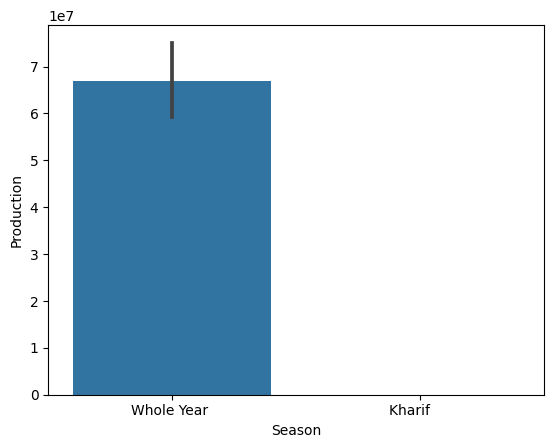

In [18]:
sns.barplot(x="Season", y="Production", data=coc_df)
plt.show()


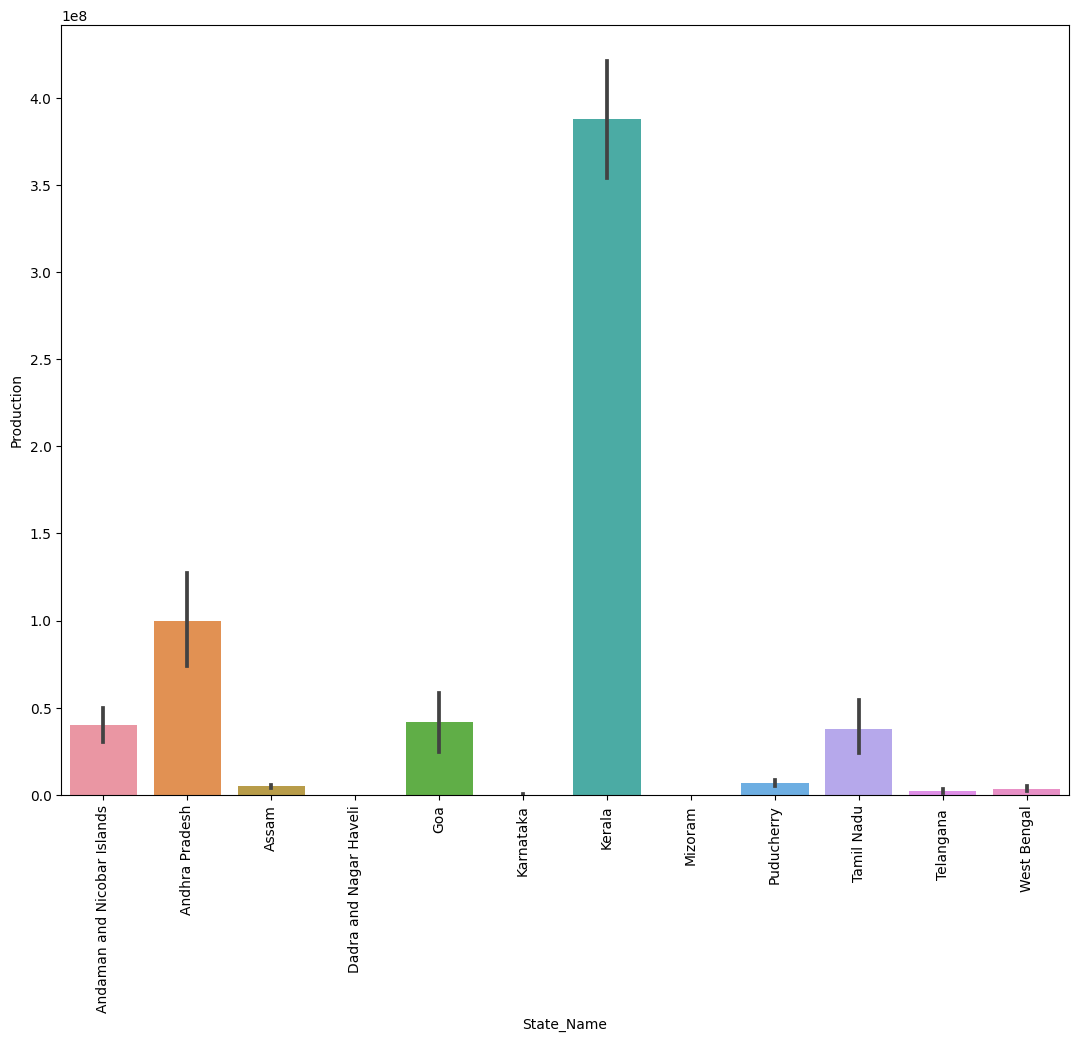

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(13, 10))
sns.barplot(x="State_Name", y="Production", data=coc_df)
plt.xticks(rotation=90)
plt.show()


In [20]:
top_coc_pro_dis = coc_df.groupby("District_Name")["Production"].sum().reset_index().sort_values(
    by='Production',ascending=False)
top_coc_pro_dis[:5]
sum_max = top_coc_pro_dis["Production"].sum()
top_coc_pro_dis["precent_of_pro"] = top_coc_pro_dis["Production"].map(lambda x:(x/sum_max)*100)
top_coc_pro_dis[:5]

,District_Name,Production,precent_of_pro
77,KOZHIKODE,1.527871e+10,11.754512
86,MALAPPURAM,1.451252e+10,11.165052
129,THIRUVANANTHAPURAM,1.001337e+10,7.703678
131,THRISSUR,9.920739e+09,7.632416
64,KANNUR,9.780310e+09,7.524379


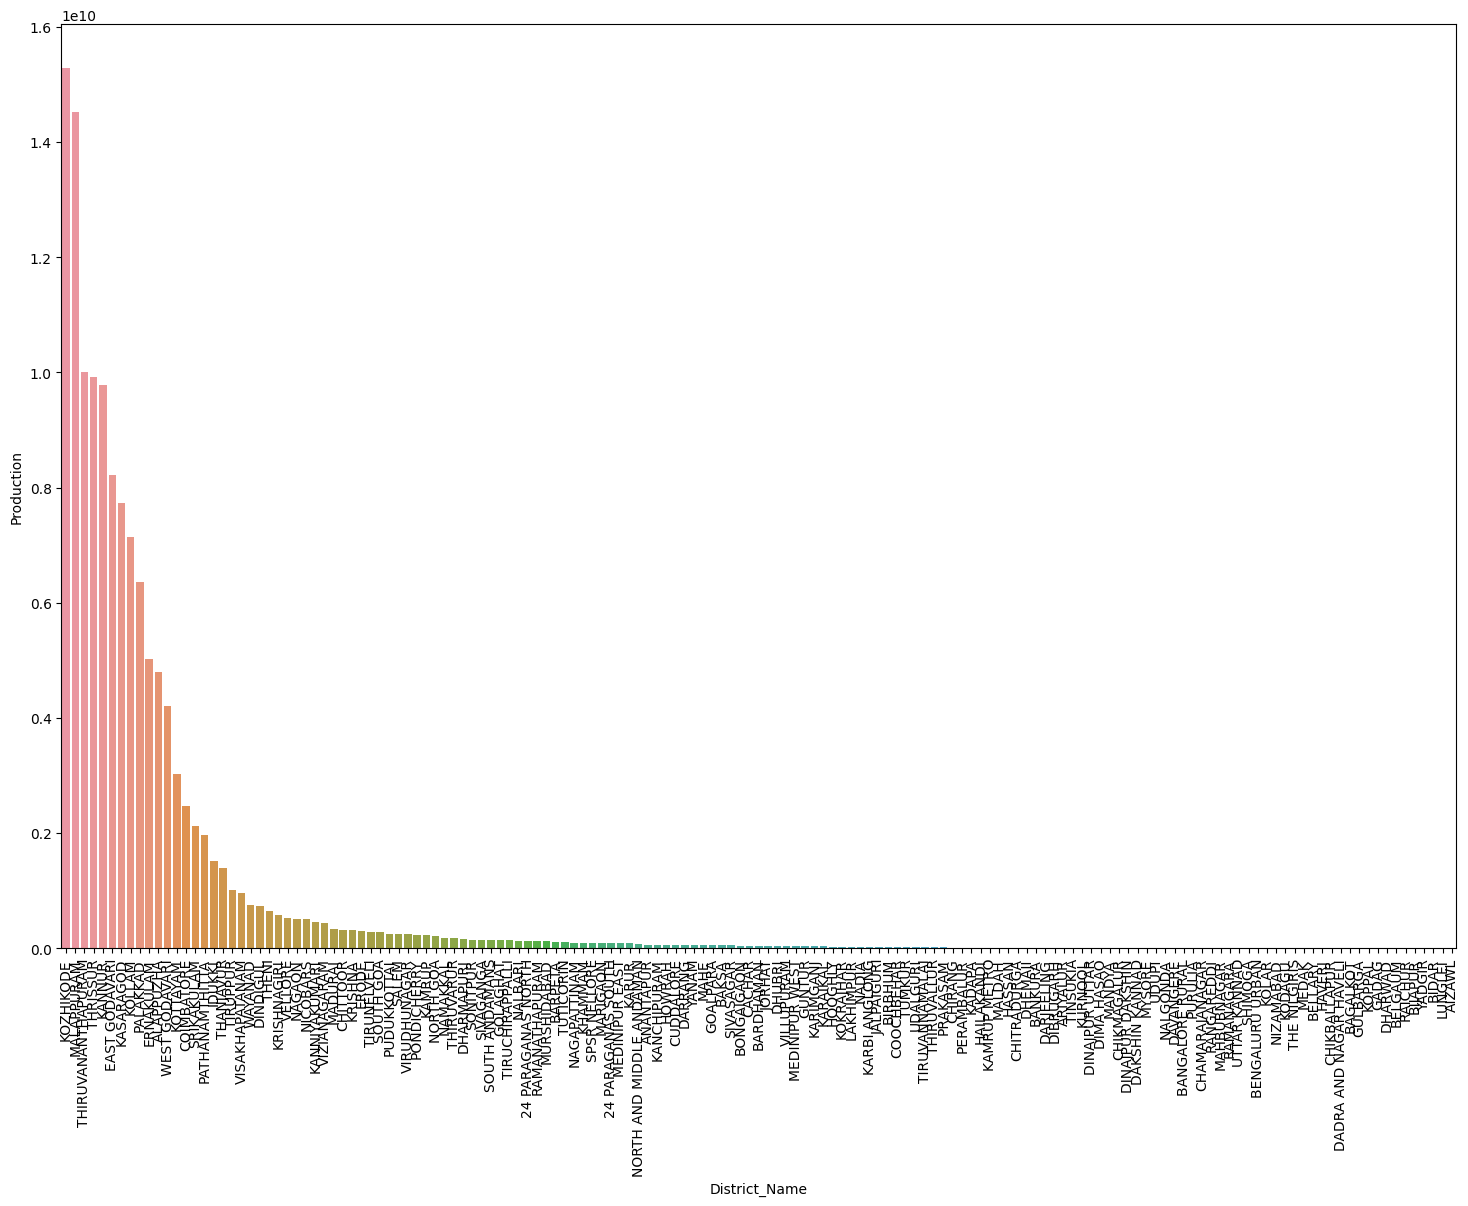

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 12))
sns.barplot(x="District_Name", y="Production", data=top_coc_pro_dis)
plt.xticks(rotation=90)
plt.show()


In [22]:
sug_df = data[data["Crop"]=="Sugarcane"]
print(sug_df.shape)
sug_df[:3]

(7827, 8)


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,percent_of_production
7,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sugarcane,1.0,2.0,1.416670e-09
16,Andaman and Nicobar Islands,NICOBARS,2001,Whole Year,Sugarcane,1.0,1.0,7.083351e-10
26,Andaman and Nicobar Islands,NICOBARS,2002,Whole Year,Sugarcane,5.0,40.0,2.833340e-08


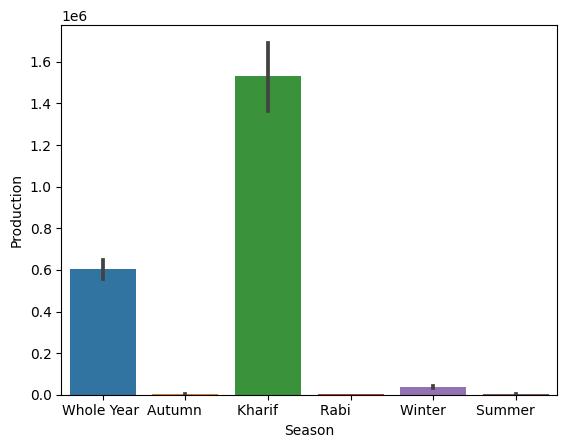

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x="Season", y="Production", data=sug_df)
plt.show()


In [24]:
data1 = data.drop(["District_Name","Crop_Year"],axis=1)

In [25]:
data_dum = pd.get_dummies(data1)
data_dum[:5]

,Area,Production,percent_of_production,State_Name_Andaman and Nicobar Islands,State_Name_Andhra Pradesh,State_Name_Arunachal Pradesh,State_Name_Assam,State_Name_Bihar,State_Name_Chandigarh,State_Name_Chhattisgarh,...,Crop_Turmeric,Crop_Turnip,Crop_Urad,Crop_Varagu,Crop_Water Melon,Crop_Wheat,Crop_Yam,Crop_other fibres,Crop_other misc. pulses,Crop_other oilseeds
0,1254.0,2000.0,1.416670e-06,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,1.0,7.083351e-10,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,102.0,321.0,2.273756e-07,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,176.0,641.0,4.540428e-07,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,720.0,165.0,1.168753e-07,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
x = data_dum.drop("Production",axis=1)
y = data_dum[["Production"]]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=42)
print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (162381, 165)
x_test : (79980, 165)
y_train : (162381, 1)
y_test : (79980, 1)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train,y_train)

In [ ]:
preds = model.predict(x_test)


In [ ]:
from sklearn.metrics import r2_score
r = r2_score(y_test,preds)
print("R2score when we predict using Randomn forest is ",r)

In [2]:
import pandas as pd

In [5]:
df1=pd.read_csv(r"C:\Users\hp\Downloads\cpdata (1).csv")

In [6]:
df1

,temperature,humidity,ph,rainfall,label
0,20.879744,82.002744,6.502985,202.935536,rice
1,21.770462,80.319644,7.038096,226.655537,rice
2,23.004459,82.320763,7.840207,263.964248,rice
3,26.491096,80.158363,6.980401,242.864034,rice
4,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...
3095,25.287846,89.636679,6.765095,58.286977,watermelon
3096,26.638386,84.695469,6.189214,48.324286,watermelon
3097,25.331045,84.305338,6.904242,41.532187,watermelon
3098,26.897502,83.892415,6.463271,43.971937,watermelon


<Axes: >

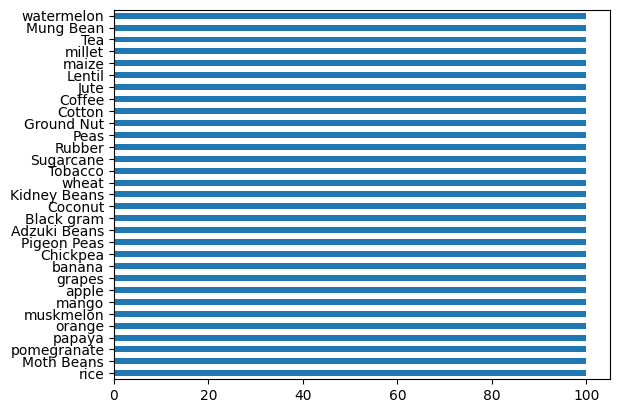

In [7]:
df1['label'].value_counts().plot(kind="barh")

In [8]:
# No. of classes / crops to recommend
num_classes = df['label'].unique().shape[0]
classes = df['label'].unique()

print("Number of classes:", num_classes)
print("Classes:", classes)

Number of classes: 31
Classes: ['rice' 'wheat' 'Mung Bean' 'Tea' 'millet' 'maize' 'Lentil' 'Jute'
 'Coffee' 'Cotton' 'Ground Nut' 'Peas' 'Rubber' 'Sugarcane' 'Tobacco'
 'Kidney Beans' 'Moth Beans' 'Coconut' 'Black gram' 'Adzuki Beans'
 'Pigeon Peas' 'Chickpea' 'banana' 'grapes' 'apple' 'mango' 'muskmelon'
 'orange' 'papaya' 'pomegranate' 'watermelon']


In [9]:
grouped = df1.groupby("label")

<Axes: ylabel='label'>

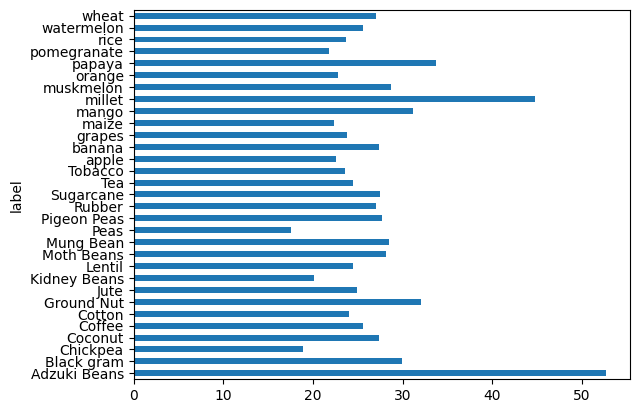

In [11]:
grouped.mean()["temperature"].plot(kind="barh")

<Axes: ylabel='label'>

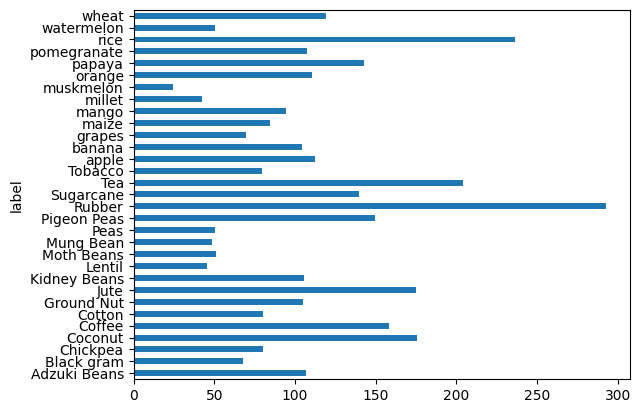

In [12]:
grouped.mean()["rainfall"].plot(kind="barh")

<Axes: ylabel='label'>

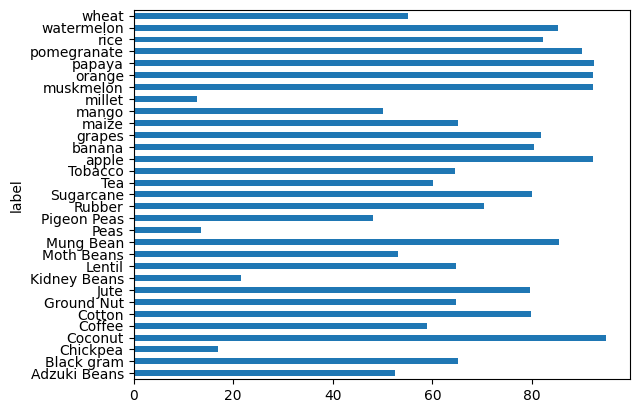

In [13]:
grouped.mean()["humidity"].plot(kind="barh")

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [15]:
feature_columns = [ 'temperature', 'humidity', 'ph', 'rainfall']

features = df[feature_columns]
labels = df[["label"]]

In [16]:
train_X, test_X, train_y, test_y = train_test_split(
    features, labels,
    test_size=0.3,
    random_state=42,
    stratify=labels
)

<Axes: ylabel='label'>

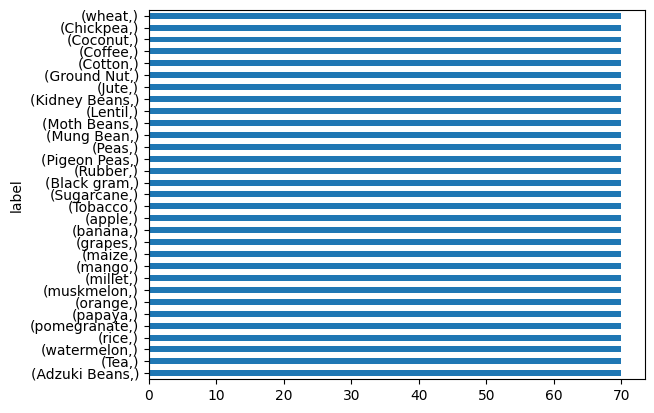

In [17]:
train_y.value_counts().plot(kind="barh") 

In [20]:
def evaluate(model):
    predictions = model.predict(test_X)
    acc = accuracy_score(predictions, test_y)
    return round(acc*100, 3)

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_y)

acc = evaluate(model)
print(f"Random Forest (accuracy): {acc}%")

C:\Users\hp\AppData\Local\Temp\ipykernel_16808\519100639.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train_X,train_y)


Random Forest (accuracy): 94.946%


In [22]:
df3=pd.read_csv(r"C:\Users\hp\Downloads\state_wise_crop_production.csv")

In [23]:
df3

,Crop,State,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield (Quintal/ Hectare)
0,ARHAR,Uttar Pradesh,9794.05,23076.74,1941.55,9.83
1,ARHAR,Karnataka,10593.15,16528.68,2172.46,7.47
2,ARHAR,Gujarat,13468.82,19551.90,1898.30,9.59
3,ARHAR,Andhra Pradesh,17051.66,24171.65,3670.54,6.42
4,ARHAR,Maharashtra,17130.55,25270.26,2775.80,8.72
5,COTTON,Maharashtra,23711.44,33116.82,2539.47,12.69
6,COTTON,Punjab,29047.10,50828.83,2003.76,24.39
7,COTTON,Andhra Pradesh,29140.77,44756.72,2509.99,17.83
8,COTTON,Gujarat,29616.09,42070.44,2179.26,19.05
9,COTTON,Haryana,29918.97,44018.18,2127.35,19.90


In [25]:
df3.shape

(49, 6)

In [26]:
df3.describe()

,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield (Quintal/ Hectare)
count,49.000000,49.000000,49.000000,49.000000
mean,20363.537347,31364.666735,1620.537755,98.086735
std,13561.435306,20095.783569,1104.990472,245.293123
min,5483.540000,7868.640000,85.790000,1.320000
25%,12774.410000,19259.840000,732.620000,9.590000
50%,17022.000000,25909.050000,1595.560000,13.700000
75%,24731.060000,35423.480000,2228.970000,36.610000
max,66335.060000,91442.630000,5777.480000,1015.450000


In [27]:
df3.drop_duplicates()

,Crop,State,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield (Quintal/ Hectare)
0,ARHAR,Uttar Pradesh,9794.05,23076.74,1941.55,9.83
1,ARHAR,Karnataka,10593.15,16528.68,2172.46,7.47
2,ARHAR,Gujarat,13468.82,19551.90,1898.30,9.59
3,ARHAR,Andhra Pradesh,17051.66,24171.65,3670.54,6.42
4,ARHAR,Maharashtra,17130.55,25270.26,2775.80,8.72
5,COTTON,Maharashtra,23711.44,33116.82,2539.47,12.69
6,COTTON,Punjab,29047.10,50828.83,2003.76,24.39
7,COTTON,Andhra Pradesh,29140.77,44756.72,2509.99,17.83
8,COTTON,Gujarat,29616.09,42070.44,2179.26,19.05
9,COTTON,Haryana,29918.97,44018.18,2127.35,19.90


In [28]:
df3.columns

Index(['Crop', 'State', 'Cost of Cultivation (`/Hectare) A2+FL',
       'Cost of Cultivation (`/Hectare) C2',
       'Cost of Production (`/Quintal) C2', 'Yield (Quintal/ Hectare) '],
      dtype='object')

In [31]:
import matplotlib.pyplot as plt

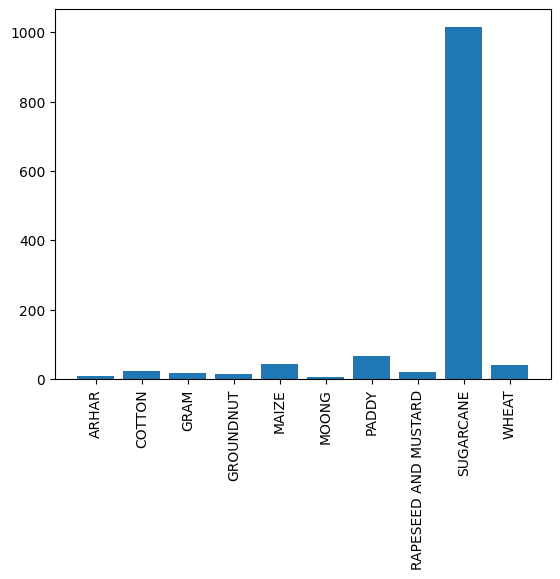

In [32]:
x=df3["Yield (Quintal/ Hectare) "]
y = df3 ["Crop"]
plt.bar(y,x)
plt.xticks(rotation=90)
plt.show()

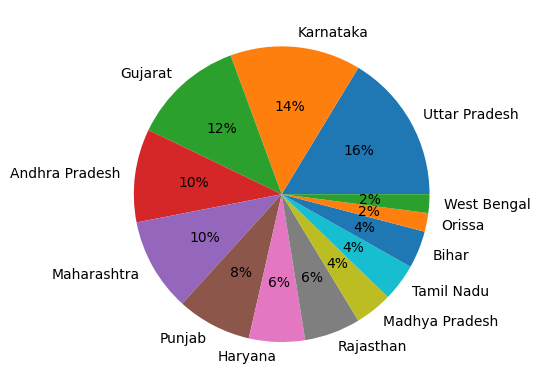

In [34]:
plt.pie(df3["State"].value_counts(),autopct="%.f%%",labels=df3["State"].unique())
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_16808\2559083958.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df3.groupby('Crop')[cols[:-1]].sum().plot(kind='bar', figsize=(12,6));


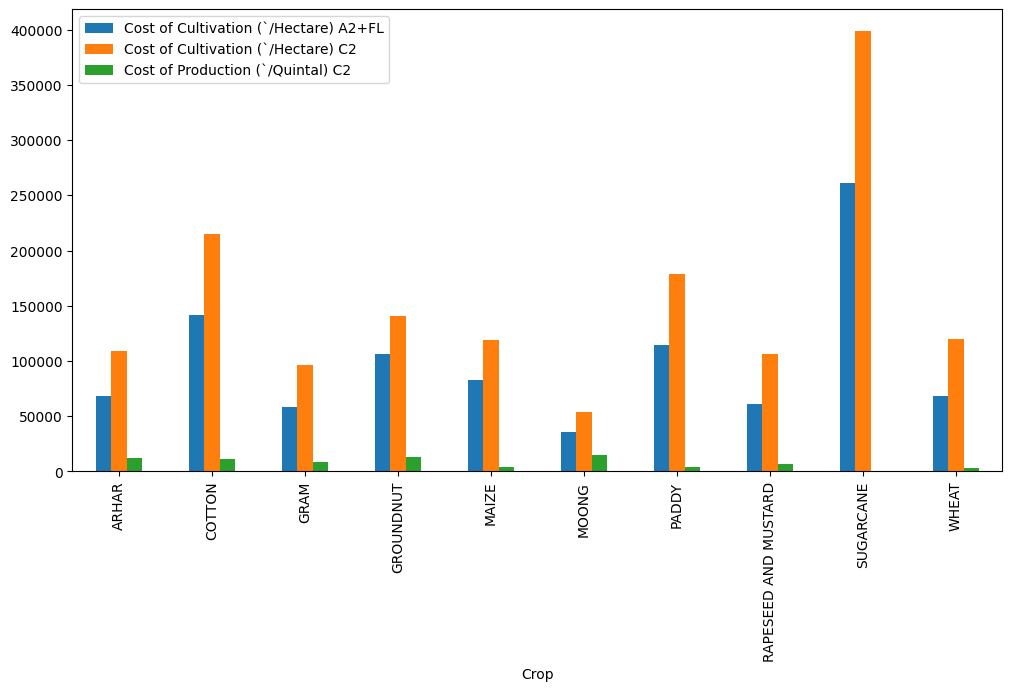

In [35]:
cols = df3.columns
df3.groupby('Crop')[cols[:-1]].sum().plot(kind='bar', figsize=(12,6));